In [767]:
# read in libraries
import sys, os
import netCDF4
import scipy.io, numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.patches as mpatches

In [768]:
import re

# Define the folder path
directory = '/Users/evenhou/Downloads/acsmdata'

# Get a list of all files in the folder
files = os.listdir(directory)

# Filter the list to include only files containing "2022"
filtered_files = [file for file in files if '2022' in file]
print(filtered_files)

['sgpaosacsmE13.b2.20220909.001651.custom.nc', 'sgpaosacsmE13.b2.20220806.001517.custom.nc', 'sgpaosacsmE13.b2.20220929.001644.custom.nc', 'sgpaosacsmE13.b2.20221209.001001.custom.nc', 'sgpaosacsmE13.b2.20220226.001343.custom.nc', 'sgpaosacsmE13.b2.20220503.001528.custom.nc', 'sgpaosacsmE13.b2.20221002.000814.custom.nc', 'sgpaosacsmE13.b2.20220118.002439.custom.nc', 'sgpaosacsmE13.b2.20220514.001830.custom.nc', 'sgpaosacsmE13.b2.20221109.001122.custom.nc', 'sgpaosacsmE13.b2.20220831.154020.custom.nc', 'sgpaosacsmE13.b2.20221008.001922.custom.nc', 'sgpaosacsmE13.b2.20220815.000012.custom.nc', 'sgpaosacsmE13.b2.20220407.001124.custom.nc', 'sgpaosacsmE13.b2.20220915.000346.custom.nc', 'sgpaosacsmE13.b2.20221101.000305.custom.nc', 'sgpaosacsmE13.b2.20221003.002423.custom.nc', 'sgpaosacsmE13.b2.20220412.002659.custom.nc', 'sgpaosacsmE13.b2.20221124.000341.custom.nc', 'sgpaosacsmE13.b2.20220608.002518.custom.nc', 'sgpaosacsmE13.b2.20220329.001604.custom.nc', 'sgpaosacsmE13.b2.20220810.000513

In [769]:
# Sort the list of files alphabetically or numerically
# sorted(filtered_files) # create an array
filtered_files.sort() # modify the original array
print(filtered_files)

['sgpaosacsmE13.b2.20220101.000632.custom.nc', 'sgpaosacsmE13.b2.20220102.002112.custom.nc', 'sgpaosacsmE13.b2.20220103.000724.custom.nc', 'sgpaosacsmE13.b2.20220104.002205.custom.nc', 'sgpaosacsmE13.b2.20220105.000813.custom.nc', 'sgpaosacsmE13.b2.20220106.002258.custom.nc', 'sgpaosacsmE13.b2.20220107.000916.custom.nc', 'sgpaosacsmE13.b2.20220108.002411.custom.nc', 'sgpaosacsmE13.b2.20220109.001025.custom.nc', 'sgpaosacsmE13.b2.20220110.002517.custom.nc', 'sgpaosacsmE13.b2.20220111.001136.custom.nc', 'sgpaosacsmE13.b2.20220112.002623.custom.nc', 'sgpaosacsmE13.b2.20220113.000724.custom.nc', 'sgpaosacsmE13.b2.20220114.002215.custom.nc', 'sgpaosacsmE13.b2.20220115.000826.custom.nc', 'sgpaosacsmE13.b2.20220116.002319.custom.nc', 'sgpaosacsmE13.b2.20220117.000945.custom.nc', 'sgpaosacsmE13.b2.20220118.002439.custom.nc', 'sgpaosacsmE13.b2.20220119.001102.custom.nc', 'sgpaosacsmE13.b2.20220120.002600.custom.nc', 'sgpaosacsmE13.b2.20220121.001231.custom.nc', 'sgpaosacsmE13.b2.20220122.002734

In [770]:
type(filtered_files)

list

In [771]:
date_arr = np.array([])
filenames = np.array([])

date_time = np.array([])
days = np.array([])

# time-interval (hourly)
total_organics = np.array([])
sulfate = np.array([])
ammonium = np.array([])
nitrate = np.array([])
chloride = np.array([])
total_conc = np.array([])

# daily
total_organics_d = np.array([])
sulfate_d = np.array([])
ammonium_d = np.array([])
nitrate_d = np.array([])
chloride_d = np.array([])
total_conc_d = np.array([])

# Process each netCDF file
for filename in filtered_files:
    file_path = os.path.join(directory, filename)

    # Open the netCDF file
    ds = netCDF4.Dataset(file_path, 'r')
    s1 = ds.dimensions['time']
    # print(filename)
    # print(s1)
    # print(len(s1))
    # print(s1.size)
    dim_time = s1.size
    # define arrays
    time = np.zeros(dim_time)
    total_organics_i = np.zeros(dim_time)
    sulfate_i = np.zeros(dim_time)
    ammonium_i = np.zeros(dim_time)
    nitrate_i = np.zeros(dim_time)
    chloride_i = np.zeros(dim_time)
    total_conc_i = np.zeros(dim_time)
   
    ncf = scipy.io.netcdf_file(file_path, mmap=False)
    date = int(filename[-25:-17]) # read i.e. 20210427
    # print(date)
    date_arr = np.append(date_arr,date)
    # print(time.shape)
    # print(ncf.variables["time"].data.shape)

    time[:] = ncf.variables["time"].data/3600 # hr
    total_organics_i[:] = ncf.variables["total_organics"].data # ug/m^3
    sulfate_i[:] = ncf.variables["sulfate"].data # ug/m^3
    ammonium_i[:] = ncf.variables["ammonium"].data # ug/m^3
    nitrate_i[:] = ncf.variables["nitrate"].data # ug/m^3
    chloride_i[:] = ncf.variables["chloride"].data # ug/m^3  
    total_conc_i[:] = total_organics_i + sulfate_i + ammonium_i + nitrate_i + chloride_i
    # print(time)
    
    # # daily concentration 1 (sum)
    # total_organics_d = np.append(total_organics_d, np.sum(total_organics_i))
    # sulfate_d = np.append(sulfate_d, np.sum(sulfate_i))
    # ammonium_d = np.append(ammonium_d, np.sum(ammonium_i))
    # nitrate_d = np.append(nitrate_d, np.sum(nitrate_i))
    # chloride_d = np.append(chloride_d, np.sum(chloride_i))
    # total_conc_d = np.append(total_conc_d, np.sum(total_conc_i))

    # daily concentration 2 (avg)
    total_organics_d = np.append(total_organics_d, np.mean(total_organics_i))
    sulfate_d = np.append(sulfate_d, np.mean(sulfate_i))
    ammonium_d = np.append(ammonium_d, np.mean(ammonium_i))
    nitrate_d = np.append(nitrate_d, np.mean(nitrate_i))
    chloride_d = np.append(chloride_d, np.mean(chloride_i))
    total_conc_d = np.append(total_conc_d, np.mean(total_conc_i))

    # time-interval concentration
    total_organics = np.append(total_organics,total_organics_i)
    sulfate = np.append(sulfate,sulfate_i)
    ammonium = np.append(ammonium,ammonium_i)
    nitrate = np.append(nitrate,nitrate_i)
    chloride = np.append(chloride,chloride_i)
    total_conc = np.append(total_conc,total_conc_i)

    # Combine the date with each time entry
    date_time_i = [f"{date} {t:.2f}" for t in time]
    # print(time)
    print(date_time_i)
    # print(type(date_time))
    date_time_i = np.array(date_time_i)
    date_time = np.append(date_time,date_time_i)
    
    # print(len(total_conc_d))
    # print(len(total_conc))
    

['20220101 0.11', '20220101 0.58', '20220101 1.06', '20220101 1.53', '20220101 2.01', '20220101 2.49', '20220101 2.96', '20220101 3.44', '20220101 3.91', '20220101 4.39', '20220101 4.86', '20220101 5.34', '20220101 5.81', '20220101 6.29', '20220101 6.76', '20220101 7.24', '20220101 7.71', '20220101 8.19', '20220101 8.67', '20220101 9.14', '20220101 9.62', '20220101 10.09', '20220101 10.57', '20220101 11.04', '20220101 11.52', '20220101 11.99', '20220101 12.47', '20220101 12.94', '20220101 13.42', '20220101 13.89', '20220101 14.37', '20220101 14.85', '20220101 15.32', '20220101 15.80', '20220101 16.27', '20220101 16.75', '20220101 17.22', '20220101 17.70', '20220101 18.17', '20220101 18.65', '20220101 19.12', '20220101 19.60', '20220101 20.07', '20220101 20.55', '20220101 21.03', '20220101 21.50', '20220101 21.98', '20220101 22.45', '20220101 22.93', '20220101 23.40', '20220101 23.88']
['20220102 0.35', '20220102 0.83', '20220102 1.30', '20220102 1.78', '20220102 2.25', '20220102 2.73',

['20220103 0.12', '20220103 0.60', '20220103 1.07', '20220103 1.55', '20220103 2.02', '20220103 2.50', '20220103 2.98', '20220103 3.45', '20220103 3.93', '20220103 4.40', '20220103 4.88', '20220103 5.35', '20220103 5.83', '20220103 6.30', '20220103 6.78', '20220103 7.25', '20220103 7.73', '20220103 8.20', '20220103 8.68', '20220103 9.16', '20220103 9.63', '20220103 10.11', '20220103 10.58', '20220103 11.06', '20220103 11.53', '20220103 12.01', '20220103 12.48', '20220103 12.96', '20220103 13.43', '20220103 13.91', '20220103 14.38', '20220103 14.86', '20220103 15.34', '20220103 15.81', '20220103 16.29', '20220103 16.76', '20220103 17.24', '20220103 17.71', '20220103 18.19', '20220103 18.66', '20220103 19.14', '20220103 19.61', '20220103 20.09', '20220103 20.56', '20220103 21.04', '20220103 21.52', '20220103 21.99', '20220103 22.47', '20220103 22.94', '20220103 23.42', '20220103 23.89']
['20220104 0.37', '20220104 0.84', '20220104 1.32', '20220104 1.79', '20220104 2.27', '20220104 2.74',

## Find 30 days with highest total concentration

In [772]:
date_time

array(['20220101 0.11', '20220101 0.58', '20220101 1.06', ...,
       '20221231 22.98', '20221231 23.46', '20221231 23.93'], dtype='<U32')

In [773]:
# Extract the date part from each element
dates = np.array([dt.split(' ')[0] for dt in date_time])

# Create a boolean masks for dates not in the range
mask = total_conc >= 0
mask_d = total_conc_d >= 0


# Use the mask to filter out unwanted elements
date_time_corrected = date_time[mask]
date_arr_corrected = date_arr[mask_d]

In [774]:
print(date_arr)

[20220101. 20220102. 20220103. 20220104. 20220105. 20220106. 20220107.
 20220108. 20220109. 20220110. 20220111. 20220112. 20220113. 20220114.
 20220115. 20220116. 20220117. 20220118. 20220119. 20220120. 20220121.
 20220122. 20220123. 20220124. 20220125. 20220126. 20220127. 20220128.
 20220129. 20220130. 20220131. 20220201. 20220202. 20220203. 20220204.
 20220205. 20220206. 20220207. 20220208. 20220209. 20220210. 20220211.
 20220212. 20220213. 20220214. 20220215. 20220216. 20220218. 20220219.
 20220220. 20220221. 20220222. 20220223. 20220224. 20220225. 20220226.
 20220227. 20220228. 20220301. 20220302. 20220303. 20220304. 20220305.
 20220306. 20220307. 20220308. 20220309. 20220317. 20220318. 20220319.
 20220320. 20220321. 20220322. 20220323. 20220324. 20220325. 20220326.
 20220327. 20220328. 20220329. 20220330. 20220331. 20220401. 20220402.
 20220403. 20220404. 20220405. 20220406. 20220407. 20220408. 20220409.
 20220410. 20220411. 20220412. 20220413. 20220414. 20220415. 20220416.
 20220

In [775]:
len(total_conc_d)

335

In [776]:
len(date_arr)

335

In [777]:
# daily concentration
total_organics_d = total_organics_d[mask_d]
sulfate_d = sulfate_d[mask_d]
ammonium_d = ammonium_d[mask_d]
nitrate_d = nitrate_d[mask_d]
chloride_d = chloride_d[mask_d]
total_conc_d = total_conc_d[mask_d]
date_arr = date_arr[mask_d]

# time-interval concentration
total_organics = total_organics[mask]
sulfate = sulfate[mask]
ammonium = ammonium[mask]
nitrate = nitrate[mask]
chloride = chloride[mask]
total_conc = total_conc[mask]


In [778]:
len(total_conc_d)

322

In [779]:
len(date_arr)

322

In [739]:
# max_index = np.argmax(total_conc)
# max_index

In [740]:
# average daily total concentration
total_conc_d

array([2.43576231, 0.8242185 , 1.93782735, 1.08409413, 1.01549215,
       0.94841334, 1.8597715 , 2.66685596, 2.225384  , 1.06414376,
       0.71525964, 0.85072947, 0.46653514, 0.68992031, 1.4305286 ,
       2.03793113, 0.85560274, 1.36100051, 1.31818823, 0.699362  ,
       0.97305538, 1.0755651 , 0.80530534, 0.02566317, 1.21730298,
       0.8647296 , 4.28129201, 1.58243254, 1.45911594, 1.13172064,
       1.97619165, 1.66844872, 1.0867995 , 0.77024733, 1.95675124,
       4.08510122, 2.68115249, 1.11299976, 0.64412537, 0.30286306,
       0.69687308, 0.4730368 , 0.47078007, 1.42992518, 1.14508292,
       1.31498501, 0.92068469, 0.5865414 , 1.33194223, 2.02970533,
       1.92447519, 1.95411486, 1.62773473, 1.21860999, 1.26021012,
       1.52624026, 2.15671909, 1.55520753, 1.33066519, 0.90221697,
       1.34572671, 1.08641462, 0.74400189, 0.6421352 , 0.92606346,
       1.73142615, 0.56340271, 0.50417412, 0.50924416, 0.64901988,
       0.87027654, 3.33174596, 2.53481947, 1.71303214, 1.93949

In [741]:
len(total_conc_d)

322

In [742]:
# # just for the outlier in 202208

# # Condition to remove elements greater than 30 in total_conc (the outlier)
# condition = total_conc <= 30

# # Filter both arrays based on the condition
# total_conc = total_conc[condition]
# date_time_corrected = date_time_corrected[condition]
# total_organics = total_organics[condition]
# sulfate = sulfate[condition]
# ammonium = ammonium[condition]
# nitrate = nitrate[condition]
# chloride = chloride[condition]

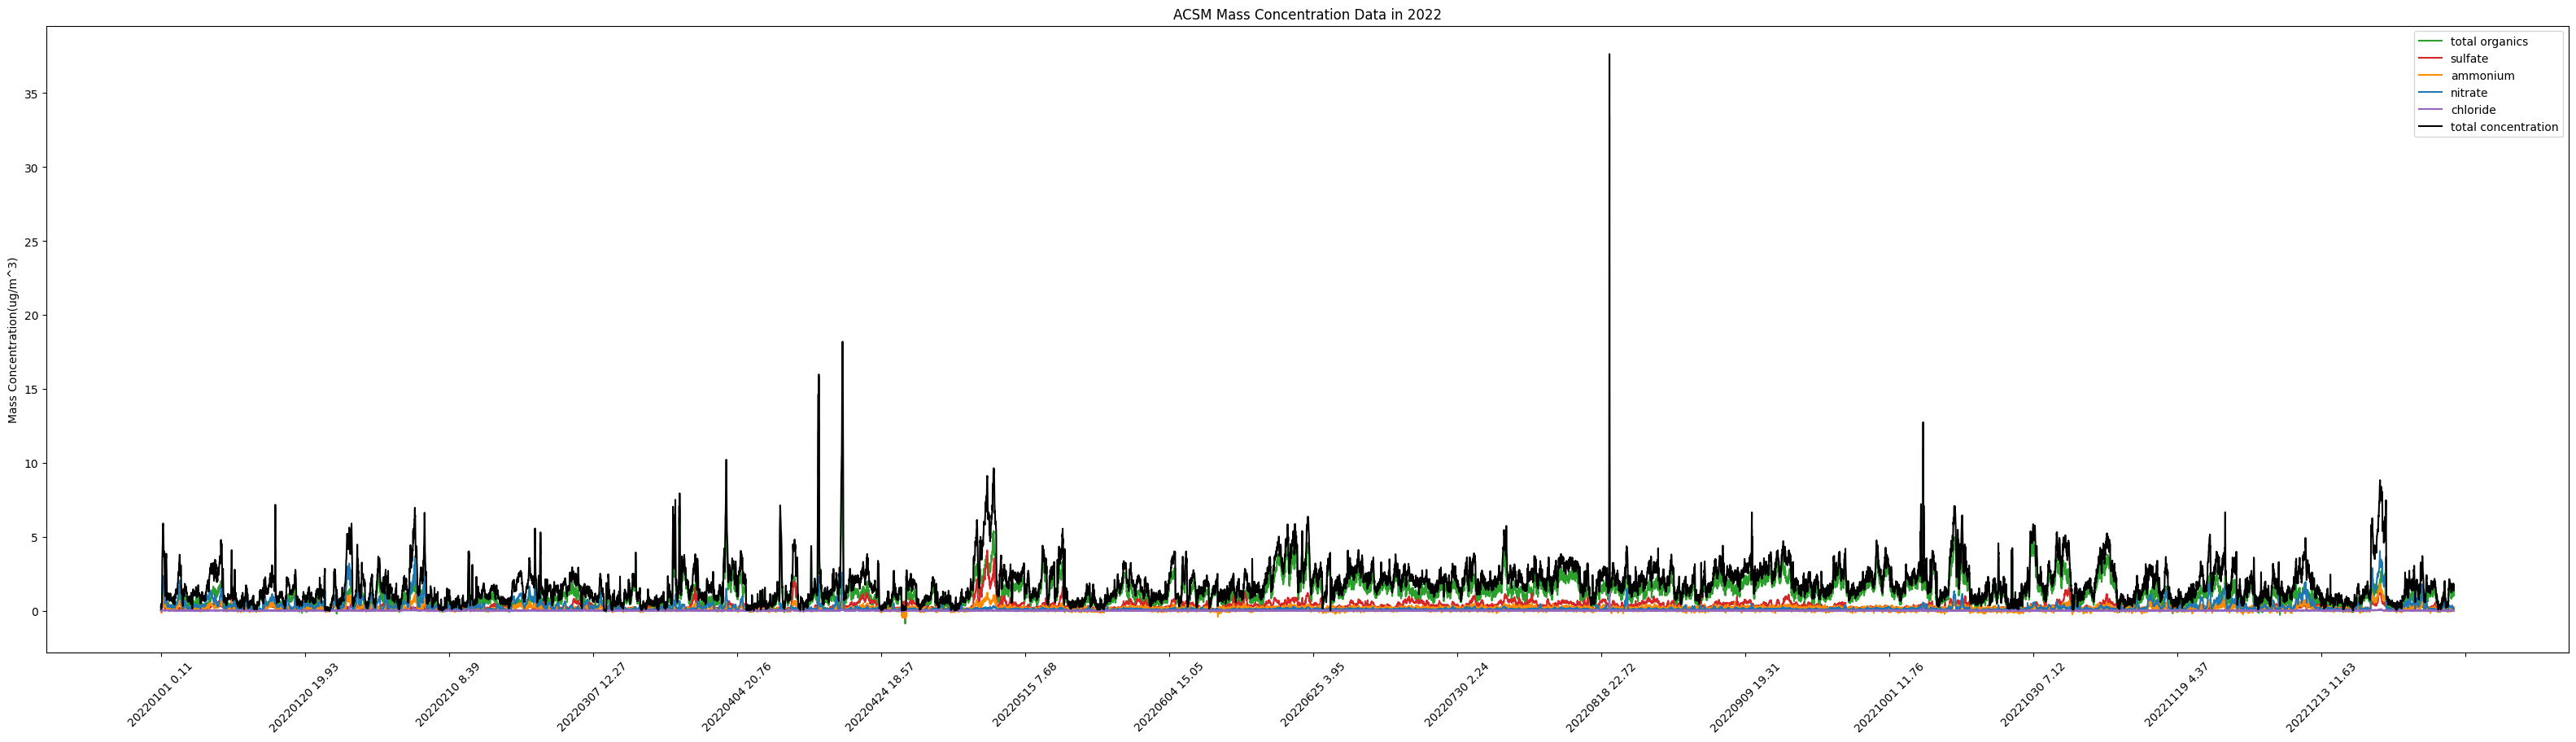

In [743]:
plt.figure(figsize=(40,10))
plt.plot(date_time_corrected,total_organics, label='total organics', c='tab:green')
plt.plot(date_time_corrected,sulfate, label='sulfate', c='tab:red')
plt.plot(date_time_corrected,ammonium, label='ammonium', c='darkorange')
plt.plot(date_time_corrected,nitrate, label='nitrate', c='tab:blue')
plt.plot(date_time_corrected,chloride, label='chloride', c='tab:purple')
plt.plot(date_time_corrected,total_conc, label='total concentration', c='black')
# date_str = f"{date:8}"  # Convert to string for formatting
# formatted_date = f"{date_str[0:4]}-{date_str[4:6]}-{date_str[6:8]}"  # YYYY-MM-DD
plt.title(f'ACSM Mass Concentration Data in 2022')
# plt.xlabel('Time')
plt.ylabel('Mass Concentration(ug/m^3)')
plt.legend()
plt.xticks(rotation=45)
# plt.grid(True)
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))  # Set nbins to your preference

plt.show()

##### ** to improve:
##### -> change the x-axis to make it more clean

## Average total concentration for the whole period that is interested in

In [744]:
# all data points
avg_total_conc = np.mean(total_conc)
print("average total concentration:", avg_total_conc, "ug/m^3")

# daily average
avg_total_conc_d = np.mean(total_conc_d)
print("daily average total concentration:", avg_total_conc_d, "ug/m^3")


average total concentration: 1.8190164069107464 ug/m^3
daily average total concentration: 1.8210468482520739 ug/m^3


In [745]:
print(date_arr)

[20220101. 20220102. 20220103. 20220104. 20220105. 20220106. 20220107.
 20220108. 20220109. 20220110. 20220111. 20220112. 20220113. 20220114.
 20220115. 20220116. 20220117. 20220118. 20220119. 20220120. 20220121.
 20220122. 20220123. 20220124. 20220125. 20220126. 20220127. 20220128.
 20220129. 20220130. 20220131. 20220201. 20220202. 20220203. 20220204.
 20220205. 20220206. 20220207. 20220208. 20220209. 20220210. 20220211.
 20220212. 20220213. 20220214. 20220215. 20220216. 20220218. 20220219.
 20220220. 20220221. 20220222. 20220223. 20220224. 20220225. 20220226.
 20220227. 20220228. 20220301. 20220302. 20220303. 20220304. 20220305.
 20220306. 20220307. 20220308. 20220309. 20220317. 20220318. 20220319.
 20220320. 20220321. 20220322. 20220323. 20220324. 20220325. 20220326.
 20220327. 20220328. 20220329. 20220330. 20220331. 20220401. 20220402.
 20220403. 20220404. 20220405. 20220406. 20220407. 20220408. 20220409.
 20220410. 20220411. 20220412. 20220413. 20220414. 20220415. 20220416.
 20220

#### 1. Time-interval highest

In [746]:
# Find indices of the 30 highest values in total_conc
top_indices = np.argsort(total_conc)[-30:][::-1]

# Get the top 3 values and their corresponding dates
top_values = total_conc[top_indices]
top_dates = date_time[top_indices]

print("Top 30 values:", top_values)
print("Corresponding time:", top_dates)

Top 30 values: [37.63761115 18.19263644 17.58409101 17.53529108 16.74066978 16.07253964
 15.97355022 15.65288258 15.33463164 14.6351793  14.05724567 13.80136776
 13.54249462 12.96152098 12.74224357 11.96398581 11.86762732 11.16396604
 10.58559907 10.56928885 10.32380299 10.21110925  9.63011379  9.56607165
  9.53220053  9.51903946  9.46157637  9.45439757  9.41814691  9.29819717]
Corresponding time: ['20220526 11.22' '20220412 23.74' '20220413 0.22' '20220412 23.27'
 '20220412 22.79' '20220413 0.69' '20220409 17.31' '20220409 17.79'
 '20220412 22.32' '20220409 15.88' '20220526 10.75' '20220413 1.17'
 '20220409 15.41' '20220412 21.84' '20220724 20.18' '20220409 16.84'
 '20220526 11.70' '20220409 18.26' '20220409 14.93' '20220412 21.36'
 '20220412 20.89' '20220328 0.02' '20220427 17.60' '20220427 17.58'
 '20220427 17.61' '20220327 23.54' '20220427 17.61' '20220412 20.41'
 '20220412 19.94' '20220427 17.59']


In [747]:
np.where(date_arr == 20220502)

(array([113]),)

In [748]:
total_conc_d[113]

6.776518957395165

In [749]:
total_conc_d

array([2.43576231, 0.8242185 , 1.93782735, 1.08409413, 1.01549215,
       0.94841334, 1.8597715 , 2.66685596, 2.225384  , 1.06414376,
       0.71525964, 0.85072947, 0.46653514, 0.68992031, 1.4305286 ,
       2.03793113, 0.85560274, 1.36100051, 1.31818823, 0.699362  ,
       0.97305538, 1.0755651 , 0.80530534, 0.02566317, 1.21730298,
       0.8647296 , 4.28129201, 1.58243254, 1.45911594, 1.13172064,
       1.97619165, 1.66844872, 1.0867995 , 0.77024733, 1.95675124,
       4.08510122, 2.68115249, 1.11299976, 0.64412537, 0.30286306,
       0.69687308, 0.4730368 , 0.47078007, 1.42992518, 1.14508292,
       1.31498501, 0.92068469, 0.5865414 , 1.33194223, 2.02970533,
       1.92447519, 1.95411486, 1.62773473, 1.21860999, 1.26021012,
       1.52624026, 2.15671909, 1.55520753, 1.33066519, 0.90221697,
       1.34572671, 1.08641462, 0.74400189, 0.6421352 , 0.92606346,
       1.73142615, 0.56340271, 0.50417412, 0.50924416, 0.64901988,
       0.87027654, 3.33174596, 2.53481947, 1.71303214, 1.93949

In [750]:
date_arr

array([20220101., 20220102., 20220103., 20220104., 20220105., 20220106.,
       20220107., 20220108., 20220109., 20220110., 20220111., 20220112.,
       20220113., 20220114., 20220115., 20220116., 20220117., 20220118.,
       20220119., 20220120., 20220121., 20220122., 20220123., 20220124.,
       20220125., 20220126., 20220127., 20220128., 20220129., 20220130.,
       20220131., 20220201., 20220202., 20220203., 20220204., 20220205.,
       20220206., 20220207., 20220208., 20220209., 20220210., 20220211.,
       20220212., 20220213., 20220214., 20220215., 20220216., 20220218.,
       20220219., 20220220., 20220221., 20220222., 20220223., 20220224.,
       20220225., 20220226., 20220227., 20220228., 20220301., 20220302.,
       20220303., 20220304., 20220305., 20220306., 20220307., 20220308.,
       20220309., 20220317., 20220318., 20220319., 20220320., 20220321.,
       20220322., 20220323., 20220324., 20220325., 20220326., 20220327.,
       20220328., 20220329., 20220330., 20220331., 

#### 2. Daily highest

In [780]:
# Find indices of the 30 highest values in total_conc_d
top_indices_d = np.argsort(total_conc_d)[-30:][::-1]

# # Find indices of the 31st to 40th highest values in total_conc_d
# top_indices_d = np.argsort(total_conc_d)[-40:-31][::-1]

# Get the top 3 values and their corresponding dates
top_values_d = total_conc_d[top_indices_d]
top_dates_d = date_arr[top_indices_d]

print("Top 30 values:", top_values_d)
print("Corresponding time:", top_dates_d)

Top 30 values: [6.77651896 6.51018146 5.26721431 5.04079441 5.00212634 4.58537419
 4.49757545 4.28129201 4.23638671 4.14266224 4.123862   4.08510122
 3.93034945 3.90980982 3.88305786 3.87217493 3.81502588 3.74626402
 3.69481624 3.64392656 3.64284309 3.46160489 3.45314519 3.43999005
 3.41823612 3.41432894 3.41214904 3.33174596 3.25414896 3.13305107]
Corresponding time: [20220510. 20221221. 20220419. 20221010. 20220509. 20220622. 20221029.
 20220127. 20221030. 20221109. 20220403. 20220205. 20221103. 20220620.
 20221011. 20220621. 20220624. 20220416. 20220511. 20221102. 20220805.
 20221222. 20220508. 20220916. 20220820. 20221220. 20221108. 20220327.
 20220813. 20220814.]
